# Cluster Analysis

## Solving Methodology

### 1. Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Load Data

In [31]:
data = pd.read_csv('market_dataset.csv', sep=',')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### 3. Plot Data

Text(0, 0.5, 'Loyalty')

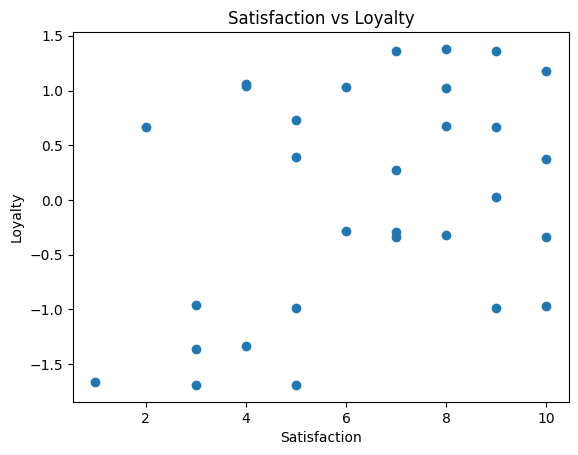

In [32]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.title('Satisfaction vs Loyalty')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 4. Select Data

In [33]:
x = data.copy()

### 5. Clustering

In [34]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

*Clustering results*

In [35]:
clusters = x.copy()
clusters['cluster_prediction'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

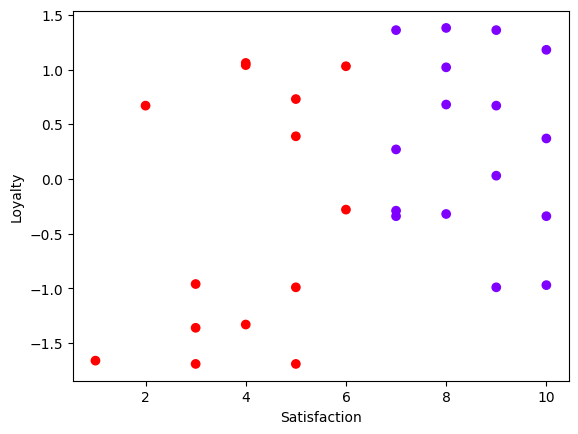

In [36]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### 6. Standardize Variables

In [37]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### 7. Elbow Method

In [38]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 22.956419533106974,
 10.24718180592842,
 9.876206345959199,
 6.732097641239194,
 5.538868131545409,
 4.358871893303257,
 3.82572500064714]

*Elbow method plot*

Text(0, 0.5, 'WCSS')

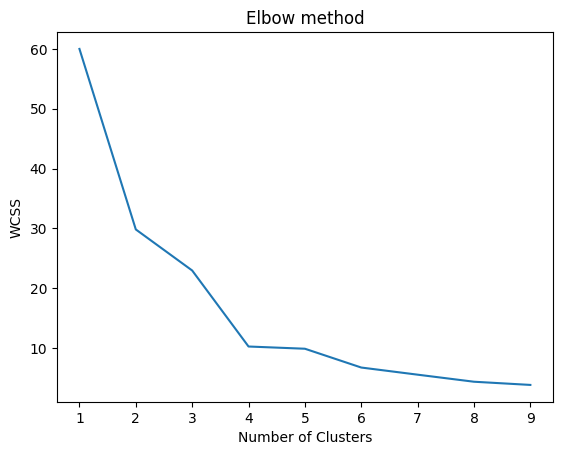

In [39]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### 8. Explore Clustering Solutions

In [40]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_prediction'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_prediction
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

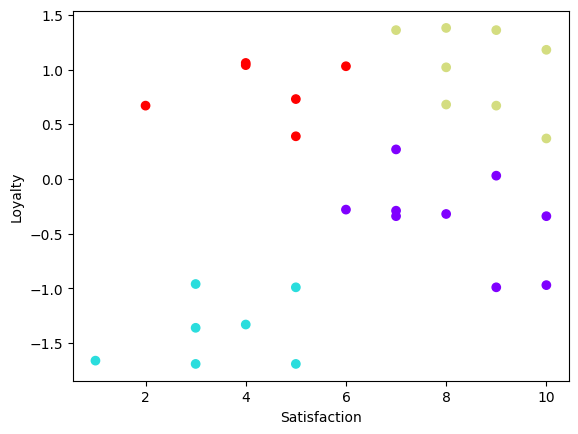

In [43]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_prediction'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We can describe 4 groups of customers based on these clusters:
- Alienated - people with low satisfaction level and low loyalty
- Supporters - people with low satisfaction level but high loyalty
- Roamers - people with high satisfaction level but low loyalty
- Fans - people with high satisfaction level and hight loyalty 